In [1]:
import json
import pickle

import k3d
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm, uniform

(content:beam-origin)=
# Beam Origin

In the MicroMeGaS detector, the zero-point of the {math}`\hat{z}` coordinate is a computed property of both the detector geometry, and the readout electronics. The incoming beam is expected to be distributed according to some uncertainty about the {math}`\hat{x}-\hat{y}` plane, therefore a histogram of the time distribution in the early pads region of the MicroMeGaS should yield a symmetric distribution. The mode of this distribution represents the origin in the time domain (see {numref}`origin-hist`).

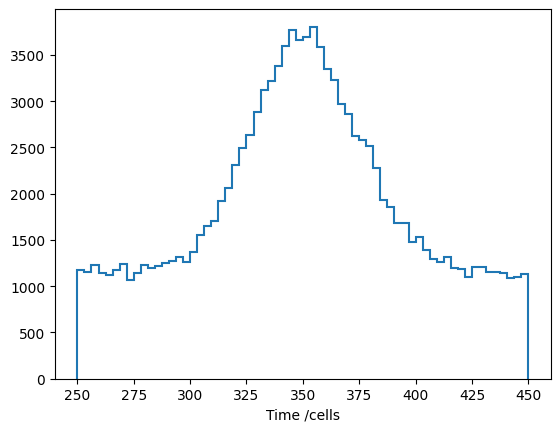

In [2]:
with open("data/origin-hist.pickle", "rb") as f:
    origin_hist = pickle.load(f)

origin_hist.plot();

In [3]:
with open("data/origin-fit.json", "r") as f:
    origin_params = json.load(f)

The distribution observed in {numref}`origin-hist` was fit as the sum of a constant function, and a Gaussian distribution, using a binned negative log-likelihood optimiser. The linear contribution of the constant function corresponds to interactions that occur in the region prior to the MicroMeGaS. These interactions occur over a wide range of stops and over a range of angles, such that the charge clusters liberated by these tracks appear evenly distributed when viewed over a narrow slice. Despite some periodicity in the residual plot, indicating a mismatch between model and data, the fit shown in {numref}`origin-hist-fit` demonstrates good agreement with the data and yields an origin of {eval}`f"{origin_params['mu']:.2f}"` cells.

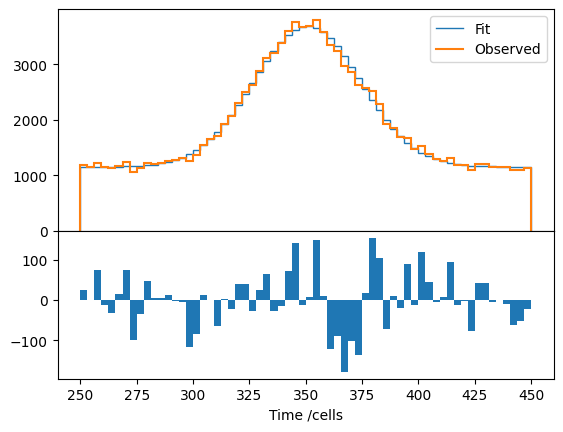

In [4]:
x_e = origin_hist.axes[0].edges
x_m = origin_hist.axes[0].centers
f = origin_hist.values()
x_r = x_e[[0, -1]]


def cdf(x, mu, sigma, z):
    return z * norm.cdf(x, mu, sigma) + (1 - z) * uniform.cdf(
        x, x_r[0], x_r[1] - x_r[0]
    )


fig, ax = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": [0.6, 0.4]})
ax[0].sharex(ax[1])

y_fit = np.diff(cdf(x_e, **origin_params)) * origin_hist.sum()
ax[0].stairs(y_fit, x_e, label="Fit")
origin_hist.plot(label="Observed", ax=ax[0])
ax[0].legend()

pull = origin_hist.values() - y_fit
ax[1].stairs(pull, x_e, fill=True)
plt.subplots_adjust(wspace=0, hspace=0)
plt.xlabel("Time /cells");